# Proyecto 2. Introducción a la inteligencia artificial


## Objetivo: 

Aplicar el concepto de aprendizaje de máquina para resolver un problema de clasificación usando los métodos vistos en el curso. 

---

## Actividades:

1. [X] Visite el sitio web de Kaggle y descargue el conjunto de datos con ejemplos de enfermedades de corazón https://www.kaggle.com/ronitf/heart-disease-uci  (En este la columna objetivo es target) Deberían usar este
2. [X] Lea la descripción de los datos cuidadosamente.
3. [X] Crear un notebook de Python(puede ser un kernel de Kaggle o un notebook local en Jupyter)
4. [ ] Cargar el conjunto de datos como un dataFrame de pandas. Realizar gráficos para cada una de las variables usando matplotlib. Las variables numéricas deben ser graficadas como histogramas, y las variables categóricas deben ser representadas como diagramas de tortas. Luego es importante que previamente haya clasificado las variables en estos 2 grupos. Su visualización debe verse como las imágenes a continuación para sus variables numéricas y categóricas:


5. [ ] Complete o remueva los elementos faltantes del conjunto de datos si existen
6. [ ] Divida el conjunto de datos en 2. 80% para entrenamiento y 20% para pruebas
7. [ ] Entrene un modelo de árbol de decisión. Ajuste los parámetros necesarios para obtener un buen resultado. Reporte la precisión del modelo para el conjunto de entrenamiento y para el conjunto de prueba. También reporta la matriz de confusión para el conjunto de pruebas.  
8. [ ] Realice una interpretación del modelo obtenido. Para esto puede imprimir el modelo obtenido por python. ¿Qué tan fácil es?
9. [ ] Repita los pasos 7 y 8 para un modelo Naive Bayes y una Red Neuronal. 
10. [ ] Compare los resultados de los 3 modelos usados en términos de la precisión, la estabilidad y la interpretabilidad de los resultados. 
11. [ ] En su opinión, ¿¡cuál de los 3 métodos usaría para resolver el problema de predecir enfermedades del corazón y porqué?

---

## Entregables

* [ ] Una carpeta comprimida con el notebook en Júpiter  y los datos. La primera línea de su notebook debe ser la instalación de todas la librerías que necesite para correr su programa usando conda. Las librerías numpy, pandas, matplotlib y sklearn ya vienen instaladas con la versión completa de anaconda.
* [ ] El notebook debe contener comentarios y apuntes suficientes como para ser el informe final.
* [ ] Una presentación de 15 minutos que se realizará en el salón de clase  el 6 de septiembre. La presentación debe concentrarse en presentar los resultados y las conclusiones a las cuales llegaron. 

---


## Attributes
1. age
2. sex
3. cp => chest pain type (4 values)
4. trestbps => resting blood pressure
5. chol => serum cholestoral in mg/dl
6. fbs => fasting blood sugar > 120 mg/dl
7. restecg => resting electrocardiographic results (values 0,1,2)
8. thalach => maximum heart rate achieved
9. exang => exercise induced angina
10. oldpeak => ST depression induced by exercise relative to rest
11. slope => the slope of the peak exercise ST segment
12. ca => number of major vessels (0-3) colored by flourosopy
13. thal => thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target =>

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

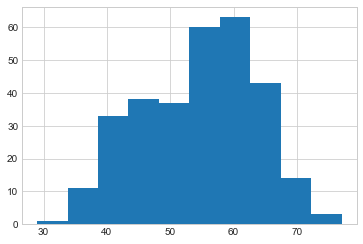

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
counts, age = np.histogram(data['age'])
plt.hist(age[:-1], age, weights=counts)

* To run bash commands use the ! at the beggining

In [4]:
!cal

      12月 2020     
日 月 火 水 木 金 土
       1  2  3  4  5
 6  7  8  9 10 11 12
13 14 15 16 17 18 19
20 21 22 23 24 25 26
27 28 29 30 31      
                    


* To plot with matplotlib ->

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

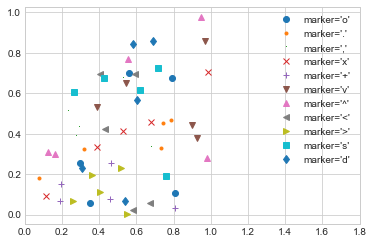

In [7]:
rng = np.random.RandomState(69)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

In [8]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [9]:
%%javascript
console.log("hello World");

<IPython.core.display.Javascript object>